In [1]:
!pip install yfinance matplotlib


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Bitcoin Summary Statistics:
 count     2253.000000
mean     22447.166425
std      16339.059802
min       3236.761719
25%       8491.992188
50%      18370.001953
75%      34668.546875
max      67566.828125
Name: Close, dtype: float64

Ethereum Summary Statistics:
 count    2253.000000
mean     1291.722723
std      1132.418385
min        84.308296
25%       231.113419
50%      1183.199585
75%      1907.256592
max      4812.087402
Name: Close, dtype: float64


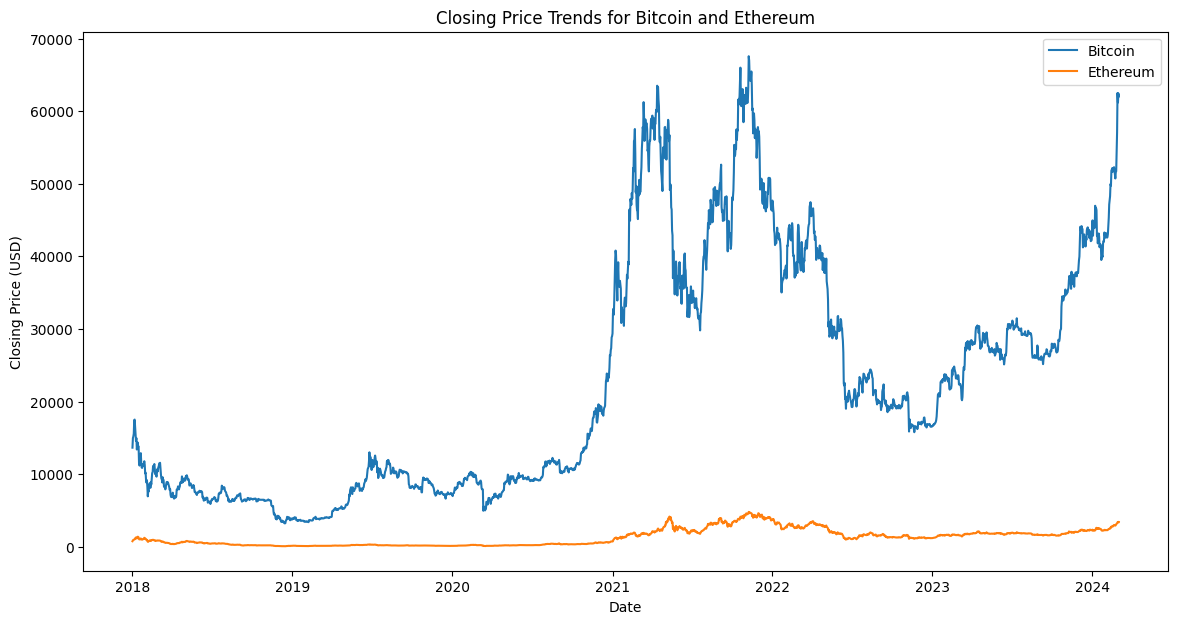

In [4]:
#Task 1 ------ Descriptive Analysis

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the tickers for Bitcoin and Ethereum
btc_ticker = 'BTC-USD'
eth_ticker = 'ETH-USD'

# Define the period for which we want to retrieve data
start_date = '2018-01-01'
end_date = '2024-03-03'

# Download historical data for Bitcoin and Ethereum
btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
eth_data = yf.download(eth_ticker, start=start_date, end=end_date)

# Calculate summary statistics for the closing prices of both cryptocurrencies
btc_summary = btc_data['Close'].describe()
eth_summary = eth_data['Close'].describe()

print("Bitcoin Summary Statistics:\n", btc_summary)
print("\nEthereum Summary Statistics:\n", eth_summary)

# Plotting the closing price trends for both cryptocurrencies
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='Bitcoin')
plt.plot(eth_data['Close'], label='Ethereum')

plt.title('Closing Price Trends for Bitcoin and Ethereum')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


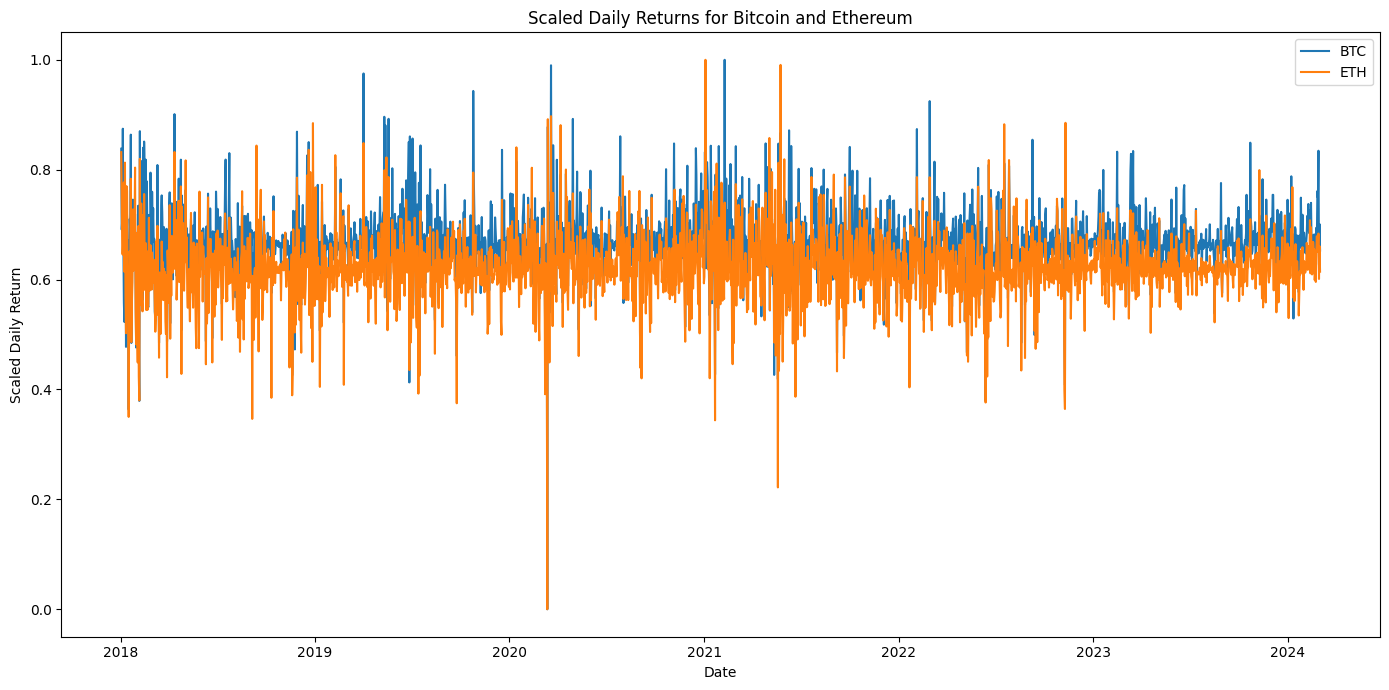

The correlation coefficient between scaled Bitcoin and Ethereum daily returns is: 0.82


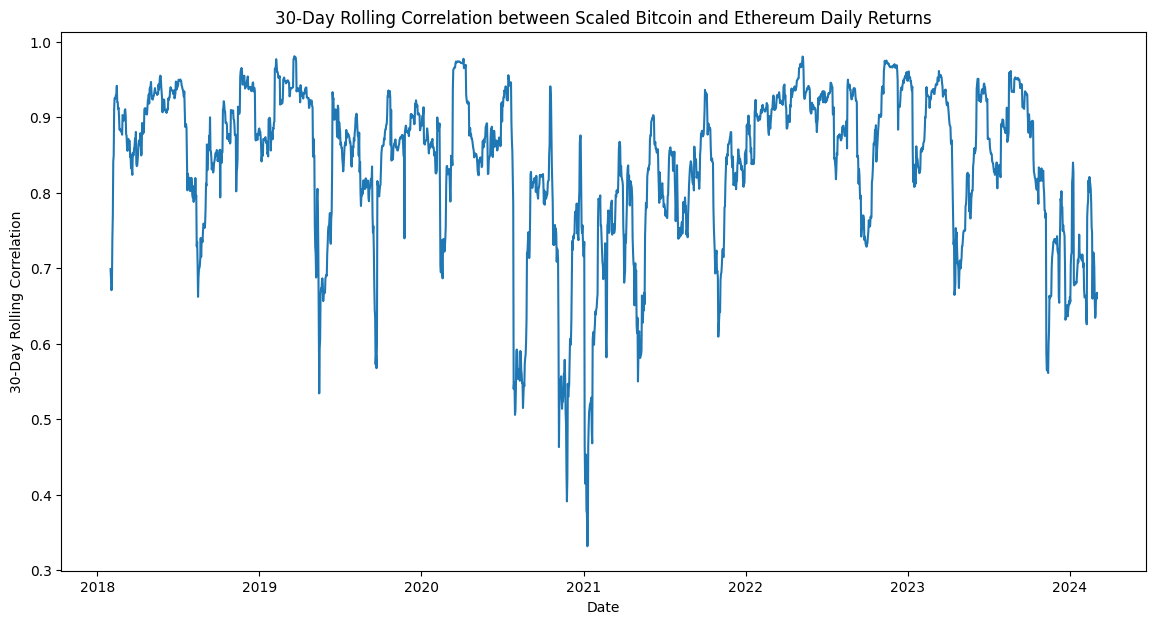

In [2]:
## Task 2-----Comparative Analysis


## Since the graph is not cleaned and can't be interpreted properly, we can first scale the data and then plot the graphs.


import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the tickers for Bitcoin and Ethereum
btc_ticker = 'BTC-USD'
eth_ticker = 'ETH-USD'

# Define the period for which we want to retrieve data
start_date = '2018-01-01'
end_date = '2024-03-03'

# Download historical data for Bitcoin and Ethereum
btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
eth_data = yf.download(eth_ticker, start=start_date, end=end_date)

# Calculate daily returns for both cryptocurrencies
btc_data['Daily Return'] = btc_data['Close'].pct_change()
eth_data['Daily Return'] = eth_data['Close'].pct_change()

# Drop the NaN values created by pct_change
btc_data = btc_data.dropna()
eth_data = eth_data.dropna()

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the daily returns for both cryptocurrencies
btc_scaled_returns = scaler.fit_transform(btc_data[['Daily Return']])
eth_scaled_returns = scaler.fit_transform(eth_data[['Daily Return']])

# Create a new DataFrame to hold the scaled daily returns
combined_scaled_returns = pd.DataFrame({
    'BTC': btc_scaled_returns.flatten(),
    'ETH': eth_scaled_returns.flatten()
}, index=btc_data.index)  # Assuming btc_data and eth_data have the same length and index

# Plot the scaled daily returns of both cryptocurrencies
fig, ax = plt.subplots(figsize=(14, 7))
for crypto in combined_scaled_returns.columns:
    ax.plot(combined_scaled_returns.index, combined_scaled_returns[crypto], label=crypto)
ax.set_title('Scaled Daily Returns for Bitcoin and Ethereum')
ax.set_xlabel('Date')
ax.set_ylabel('Scaled Daily Return')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

# Calculate and print the correlation on scaled data
correlation_scaled = combined_scaled_returns.corr().iloc[0,1]
print(f"The correlation coefficient between scaled Bitcoin and Ethereum daily returns is: {correlation_scaled:.2f}")

# Rolling correlation on scaled data
rolling_correlation_scaled = combined_scaled_returns['BTC'].rolling(window=30).corr(combined_scaled_returns['ETH'])

# Plot rolling correlation of scaled data
plt.figure(figsize=(14, 7))
plt.plot(rolling_correlation_scaled)
plt.title('30-Day Rolling Correlation between Scaled Bitcoin and Ethereum Daily Returns')
plt.xlabel('Date')
plt.ylabel('30-Day Rolling Correlation')
plt.show()


In [11]:
## Task 4----Investment Analysis:


import yfinance as yf

# Define the tickers for Bitcoin and Ethereum
btc_ticker = 'BTC-USD'
eth_ticker = 'ETH-USD'

# Define the period for which we want to retrieve data
start_date = '2020-01-01'
end_date = '2021-01-01'  # Assuming we are analyzing over one year

# Download historical data for Bitcoin and Ethereum
btc_data = yf.download(btc_ticker, start=start_date, end=end_date)
eth_data = yf.download(eth_ticker, start=start_date, end=end_date)

# Assume an initial investment for both Bitcoin and Ethereum
initial_investment = 10000  # Example: $10,000 in each

# Calculate the initial and final prices for both cryptocurrencies
btc_initial_price = btc_data['Close'].iloc[0]
btc_final_price = btc_data['Close'].iloc[-1]

eth_initial_price = eth_data['Close'].iloc[0]
eth_final_price = eth_data['Close'].iloc[-1]

# Calculate the amount of Bitcoin and Ethereum bought with the initial investment
btc_bought = initial_investment / btc_initial_price
eth_bought = initial_investment / eth_initial_price

# Calculate the final value of the investment in Bitcoin and Ethereum
btc_final_value = btc_bought * btc_final_price
eth_final_value = eth_bought * eth_final_price

# Calculate the ROI for both investments
btc_roi = (btc_final_value - initial_investment) / initial_investment * 100
eth_roi = (eth_final_value - initial_investment) / initial_investment * 100

print(f"Bitcoin ROI: {btc_roi:.2f}%")
print(f"Ethereum ROI: {eth_roi:.2f}%")

# Compare the ROI
if btc_roi > eth_roi:
    print("Bitcoin had a higher return on investment over the year.")
elif eth_roi > btc_roi:
    print("Ethereum had a higher return on investment over the year.")
else:
    print("Both cryptocurrencies had the same return on investment over the year.")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Bitcoin ROI: 302.79%
Ethereum ROI: 464.06%
Ethereum had a higher return on investment over the year.


[*********************100%%**********************]  1 of 1 completed


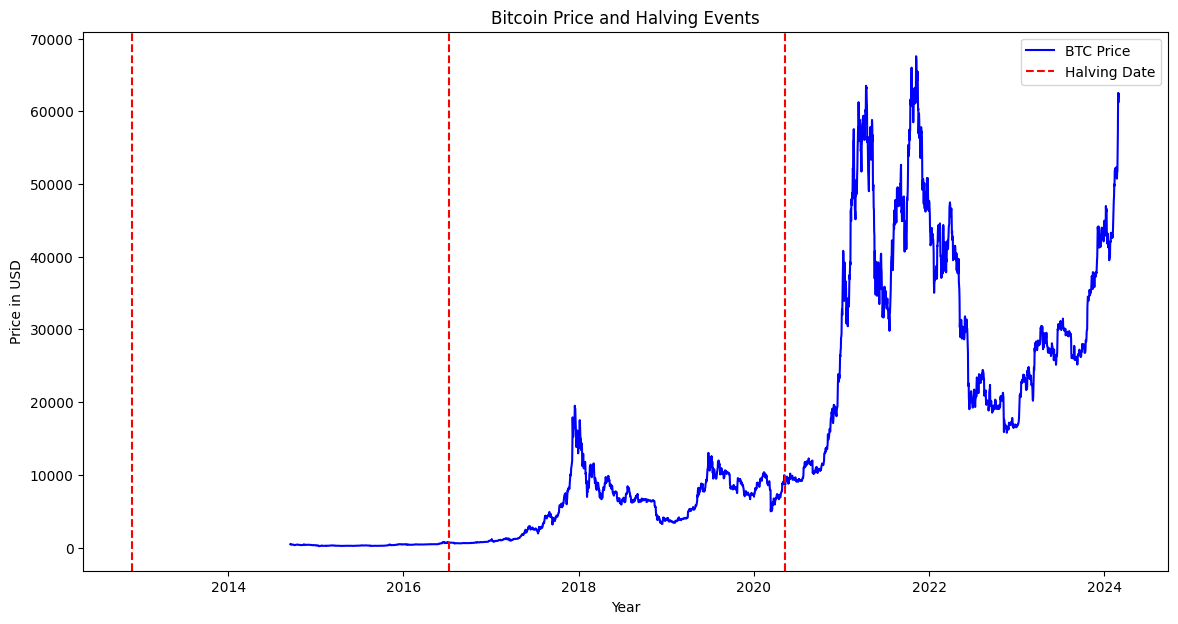

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


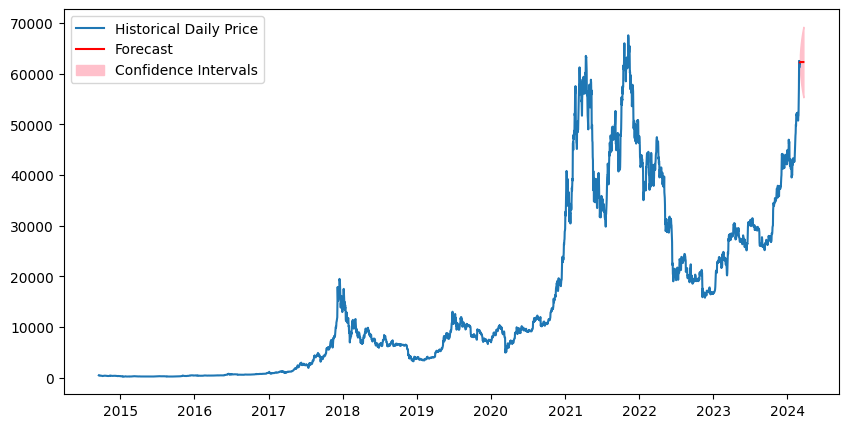

Predicted price for Q3 2024: $62291.98
Predicted price for Q4 2024: $62293.73
Predicted price for Q1 2025: $62294.01
Predicted price for Q2 2025: $62279.87


In [3]:

import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset
import pandas as pd
import matplotlib.pyplot as plt


#Task 5 -Cyclical price trend and future price prediction:

#Part 1


# Step 1: Collect Bitcoin Price Data
btc_data = yf.download('BTC-USD', start='2010-01-01', end='2024-03-03')

# Step 2: Identify Halving Dates
halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11']
halving_dates_pd = pd.to_datetime(halving_dates)

# Step 3: Analyze & Visualize Price Around Halving Dates
plt.figure(figsize=(14, 7))
plt.plot(btc_data['Close'], label='BTC Price', color='blue')
for date in halving_dates_pd:
    plt.axvline(x=date, color='red', linestyle='--', label='Halving Date' if date == halving_dates_pd[0] else "")

# Enhance Plot
plt.title('Bitcoin Price and Halving Events')
plt.xlabel('Year')
plt.ylabel('Price in USD')
plt.legend()
plt.show()


#Task 5----- part 2


# Download historical data for Bitcoin
btc_data = yf.download('BTC-USD', start='2010-01-01', end='2024-03-03')

# We'll work with 'Close' prices
btc_close = btc_data['Close']



# Define the model
# Note: The order (p,d,q) needs to be tuned based on the dataset.
arima_model = ARIMA(btc_close, order=(5,1,0))
arima_result = arima_model.fit()

# Predict the future prices

# We create a date range for the next 6 quarters
future_dates = [btc_close.index[-1] + DateOffset(months=x) for x in range(1, 19)]
future_dates_df = pd.DataFrame(index=future_dates)

# Append the future dates to the existing data
future_df = pd.concat([btc_close, future_dates_df])

# Forecast the prices
# The number '6' in the 'steps' argument is because we want to predict for the next 6 quarters.
forecast = arima_result.get_forecast(steps=18)
predicted_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Plotting the results
plt.figure(figsize=(10,5))
plt.plot(btc_close.index, btc_close, label='Historical Daily Price')
plt.plot(predicted_mean.index, predicted_mean, color='r', label='Forecast')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:,0], confidence_intervals.iloc[:,1], color='pink', label='Confidence Intervals')
plt.legend()
plt.show()

# Printing the predicted prices for Q3, Q4 of 2024 and Q1, Q2 of 2025
print(f"Predicted price for Q3 2024: ${predicted_mean[future_dates_df.index.month == 9].iloc[0]:.2f}")
print(f"Predicted price for Q4 2024: ${predicted_mean[future_dates_df.index.month == 12].iloc[0]:.2f}")
print(f"Predicted price for Q1 2025: ${predicted_mean[future_dates_df.index.month == 3].iloc[0]:.2f}")
print(f"Predicted price for Q2 2025: ${predicted_mean[future_dates_df.index.month == 6].iloc[0]:.2f}")


The periods leading up to each halving event (marked by red dashed lines) generally show an increase in price. This pattern is a common observation in the cryptocurrency community, where it is believed that halving events, due to their reduction in the rate of new Bitcoin creation, lead to an anticipation of decreased supply against a steady or increasing demand, potentially driving up the price.

Following each halving, there appears to be increased volatility in the price of Bitcoin. The price spikes to new highs and then often retracts significantly. This could be due to a variety of factors including market speculation, investors taking profits, and market readjustment to the new supply rate.

Despite the volatility, the overall long-term trend of Bitcoin's price is upward. Each peak after a halving event is higher than the previous peaks, indicating that the general trajectory of Bitcoin's price has been positive.

The graph also suggests a cyclical pattern of growth leading up to a halving, followed by a sharp increase and subsequent volatility. However, attributing this behavior solely to halving events would be an oversimplification, as many other market dynamics and external factors can influence Bitcoin's price.


[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


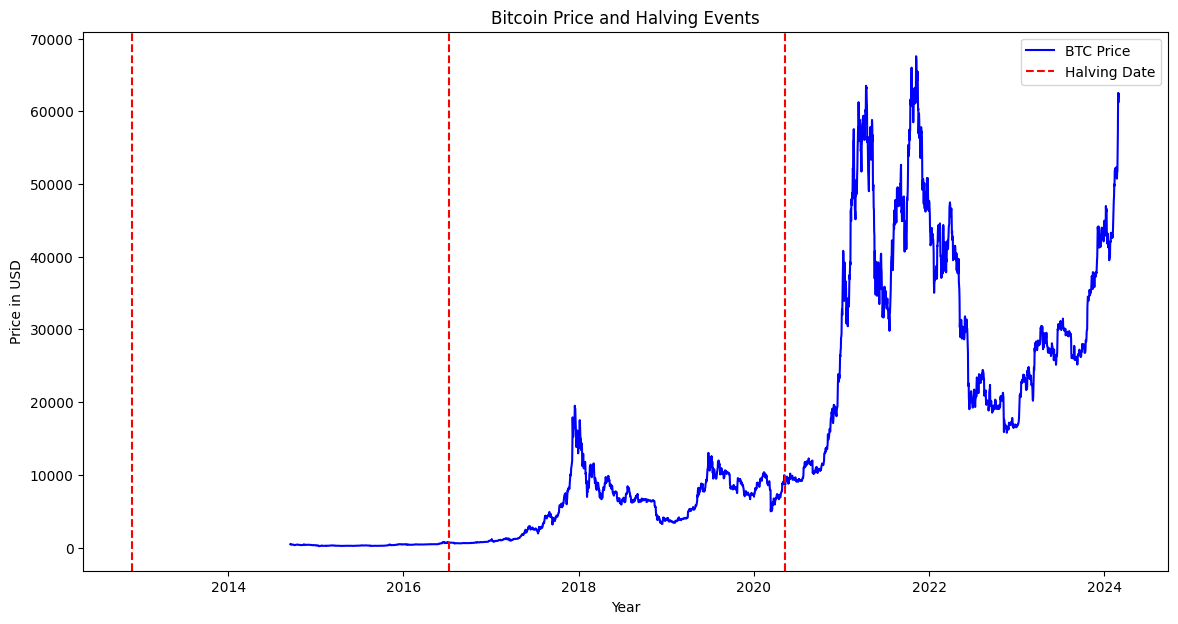

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Define the tickers for Bitcoin
btc_ticker = 'BTC-USD'

# Define the period for which we want to retrieve data
start_date = '2010-01-01'
end_date = '2024-03-03'

# Download historical data for Bitcoin
btc_data = yf.download(btc_ticker, start=start_date, end=end_date)

# Check for missing data at the beginning of the dataset
print(btc_data.head())

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(btc_data.index, btc_data['Close'], label='BTC Price', color='blue')

# Define halving dates and plot them
halving_dates = ['2012-11-28', '2016-07-09', '2020-05-11']
for date in halving_dates:
    plt.axvline(x=pd.to_datetime(date), color='red', linestyle='--', label='Halving Date' if date == halving_dates[0] else "")

plt.title('Bitcoin Price and Halving Events')
plt.xlabel('Year')
plt.ylabel('Price in USD')
plt.legend()
plt.show()


In [1]:
##Task 5 -----Part 2 ----More complex Model using test and train data.


import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd

# Download historical data for Bitcoin
btc_data = yf.download('BTC-USD', start='2010-01-01', end='2024-03-03')
btc_close = btc_data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
btc_scaled = scaler.fit_transform(btc_close)

# Create a dataset where X is the number of past observations used to predict the next observation
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

# Define the time step and create the train dataset
time_step = 100
X_train, y_train = create_dataset(btc_scaled, time_step)

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)



# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Note: For a real model, we would likely need more epochs and also a validation set to monitor performance.
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)



future_periods = 6  # Next 6 quarters
predictions = []

last_train_batch = btc_scaled[-time_step:]
current_batch = last_train_batch.reshape((1, time_step, 1))

for i in range(future_periods):
     # Get prediction 1 time step ahead ([0] is for grabbing just the number instead of [array])
     current_pred = model.predict(current_batch)[0]

     # Store prediction
     predictions.append(current_pred)

     # Update batch to include prediction and drop first value
     current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

# # Inverse transform to before scaling so we get actual prices
real_predictions = scaler.inverse_transform(predictions)

# # Define the future dates for the quarters
future_dates = pd.date_range(start=btc_data.index[-1], periods=future_periods, freq='Q')

# # Map predictions to the corresponding future dates
predicted_prices = pd.Series(data=real_predictions.flatten(), index=future_dates)
predicted_prices



[*********************100%%**********************]  1 of 1 completed


Epoch 1/10
105/105 [==============================] - 25s 190ms/step - loss: 0.0053
Epoch 2/10
105/105 [==============================] - 20s 189ms/step - loss: 8.1145e-04
Epoch 3/10
105/105 [==============================] - 11s 106ms/step - loss: 7.6157e-04
Epoch 4/10
105/105 [==============================] - 9s 88ms/step - loss: 5.6187e-04
Epoch 5/10
105/105 [==============================] - 10s 94ms/step - loss: 5.0222e-04
Epoch 6/10
105/105 [==============================] - 10s 94ms/step - loss: 5.1287e-04
Epoch 7/10
105/105 [==============================] - 9s 86ms/step - loss: 4.3645e-04
Epoch 8/10
105/105 [==============================] - 9s 90ms/step - loss: 3.7187e-04
Epoch 9/10
105/105 [==============================] - 10s 95ms/step - loss: 3.5729e-04
Epoch 10/10
1/1 [==============================] - 0s 30ms/step


2024-03-31    62187.797349
2024-06-30    62191.484662
2024-09-30    61768.343383
2024-12-31    61061.676641
2025-03-31    60159.501966
2025-06-30    59130.175237
Freq: Q-DEC, dtype: float64